In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Data Preparation

In [23]:
df = pd.read_csv("phone_usage_india.csv")
df

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17681,U17682,27,Other,Mumbai,Apple,iOS,7.2,36.6,90.4,81,5.1,4007,3.8,3.3,1380,Entertainment
17682,U17683,40,Female,Chennai,Oppo,iOS,9.5,12.9,243.0,166,4.3,8550,3.4,0.7,222,Education
17683,U17684,34,Female,Ahmedabad,Realme,Android,1.1,48.9,74.7,70,5.3,5516,0.7,4.0,1612,Entertainment
17684,U17685,22,Male,Hyderabad,Vivo,Android,8.8,25.6,105.6,96,2.4,3614,6.6,0.8,1528,Work


In [24]:
df.drop(columns=['User ID'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           17686 non-null  int64  
 1   Gender                        17686 non-null  object 
 2   Location                      17686 non-null  object 
 3   Phone Brand                   17686 non-null  object 
 4   OS                            17686 non-null  object 
 5   Screen Time (hrs/day)         17686 non-null  float64
 6   Data Usage (GB/month)         17686 non-null  float64
 7   Calls Duration (mins/day)     17686 non-null  float64
 8   Number of Apps Installed      17686 non-null  int64  
 9   Social Media Time (hrs/day)   17686 non-null  float64
 10  E-commerce Spend (INR/month)  17686 non-null  int64  
 11  Streaming Time (hrs/day)      17686 non-null  float64
 12  Gaming Time (hrs/day)         17686 non-null  float64
 13  M

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.describe()

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,37.584247,6.546376,25.411257,151.405846,104.584869,3.252369,5075.707848,4.250616,2.490874,1042.785367
std,13.338252,3.172677,14.122167,84.923353,55.217097,1.590223,2871.604841,2.155683,1.446003,552.502067
min,15.000000,1.000000,1.000000,5.000000,10.000000,0.500000,100.000000,0.500000,0.000000,100.000000
25%,26.000000,3.800000,13.200000,77.325000,57.000000,1.900000,2587.500000,2.400000,1.200000,561.000000
50%,38.000000,6.600000,25.300000,150.600000,104.000000,3.200000,5052.000000,4.200000,2.500000,1040.000000
75%,49.000000,9.300000,37.600000,223.900000,152.000000,4.600000,7606.000000,6.100000,3.700000,1521.750000
max,60.000000,12.000000,50.000000,300.000000,200.000000,6.000000,10000.000000,8.000000,5.000000,2000.000000


In [27]:
print("Nullvalues :\n",df.isna().sum())
print("duplicated values: ",df.duplicated().sum())

Nullvalues :
 Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64
duplicated values:  0


# Data Cleaning

In [28]:
# changing the data for correctness
df.loc[df['Phone Brand'] == "Apple", 'OS'] = "iOS"
df.loc[df['Phone Brand'] != "Apple", 'OS'] = "Android"

In [29]:
# verifying the changes
print(df.groupby(['Phone Brand', 'OS']).size())
print(df['OS'].value_counts())

Phone Brand   OS     
Apple         iOS        1775
Google Pixel  Android    1729
Motorola      Android    1717
Nokia         Android    1816
OnePlus       Android    1807
Oppo          Android    1716
Realme        Android    1762
Samsung       Android    1764
Vivo          Android    1797
Xiaomi        Android    1803
dtype: int64
OS
Android    15911
iOS         1775
Name: count, dtype: int64


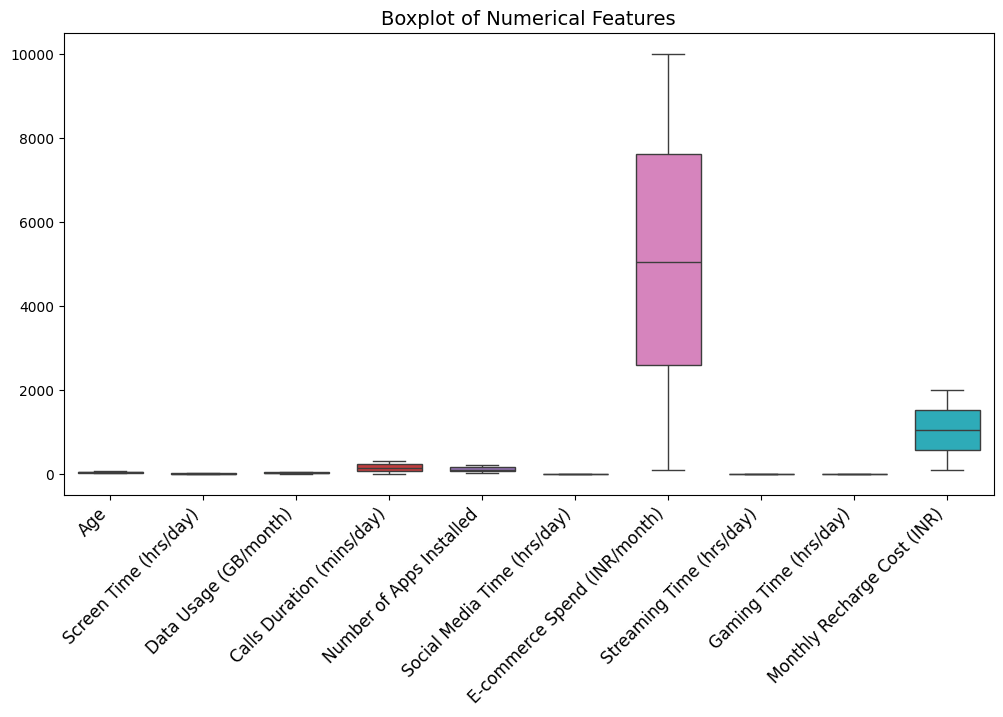

In [30]:
# checking for outliers

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="v", width=0.7)
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate and align right
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.show()

In [31]:
columns = ['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Calls Duration (mins/day)',
            'Number of Apps Installed', 'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
            'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)', 'Monthly Recharge Cost (INR)']
def remove_outliers(df, columns):
    for col in columns:
            Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
            Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
            IQR = Q3 - Q1  # Interquartile Range
            lower_bound = Q1 - 1.5 * IQR  # Lower bound
            upper_bound = Q3 + 1.5 * IQR  # Upper bound
            
            # Remove outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

df = remove_outliers(df, columns)

In [32]:
print("original shape",df.shape)
print("Shape after Clening",df.shape)

original shape (17686, 15)
Shape after Clening (17686, 15)


# EDA

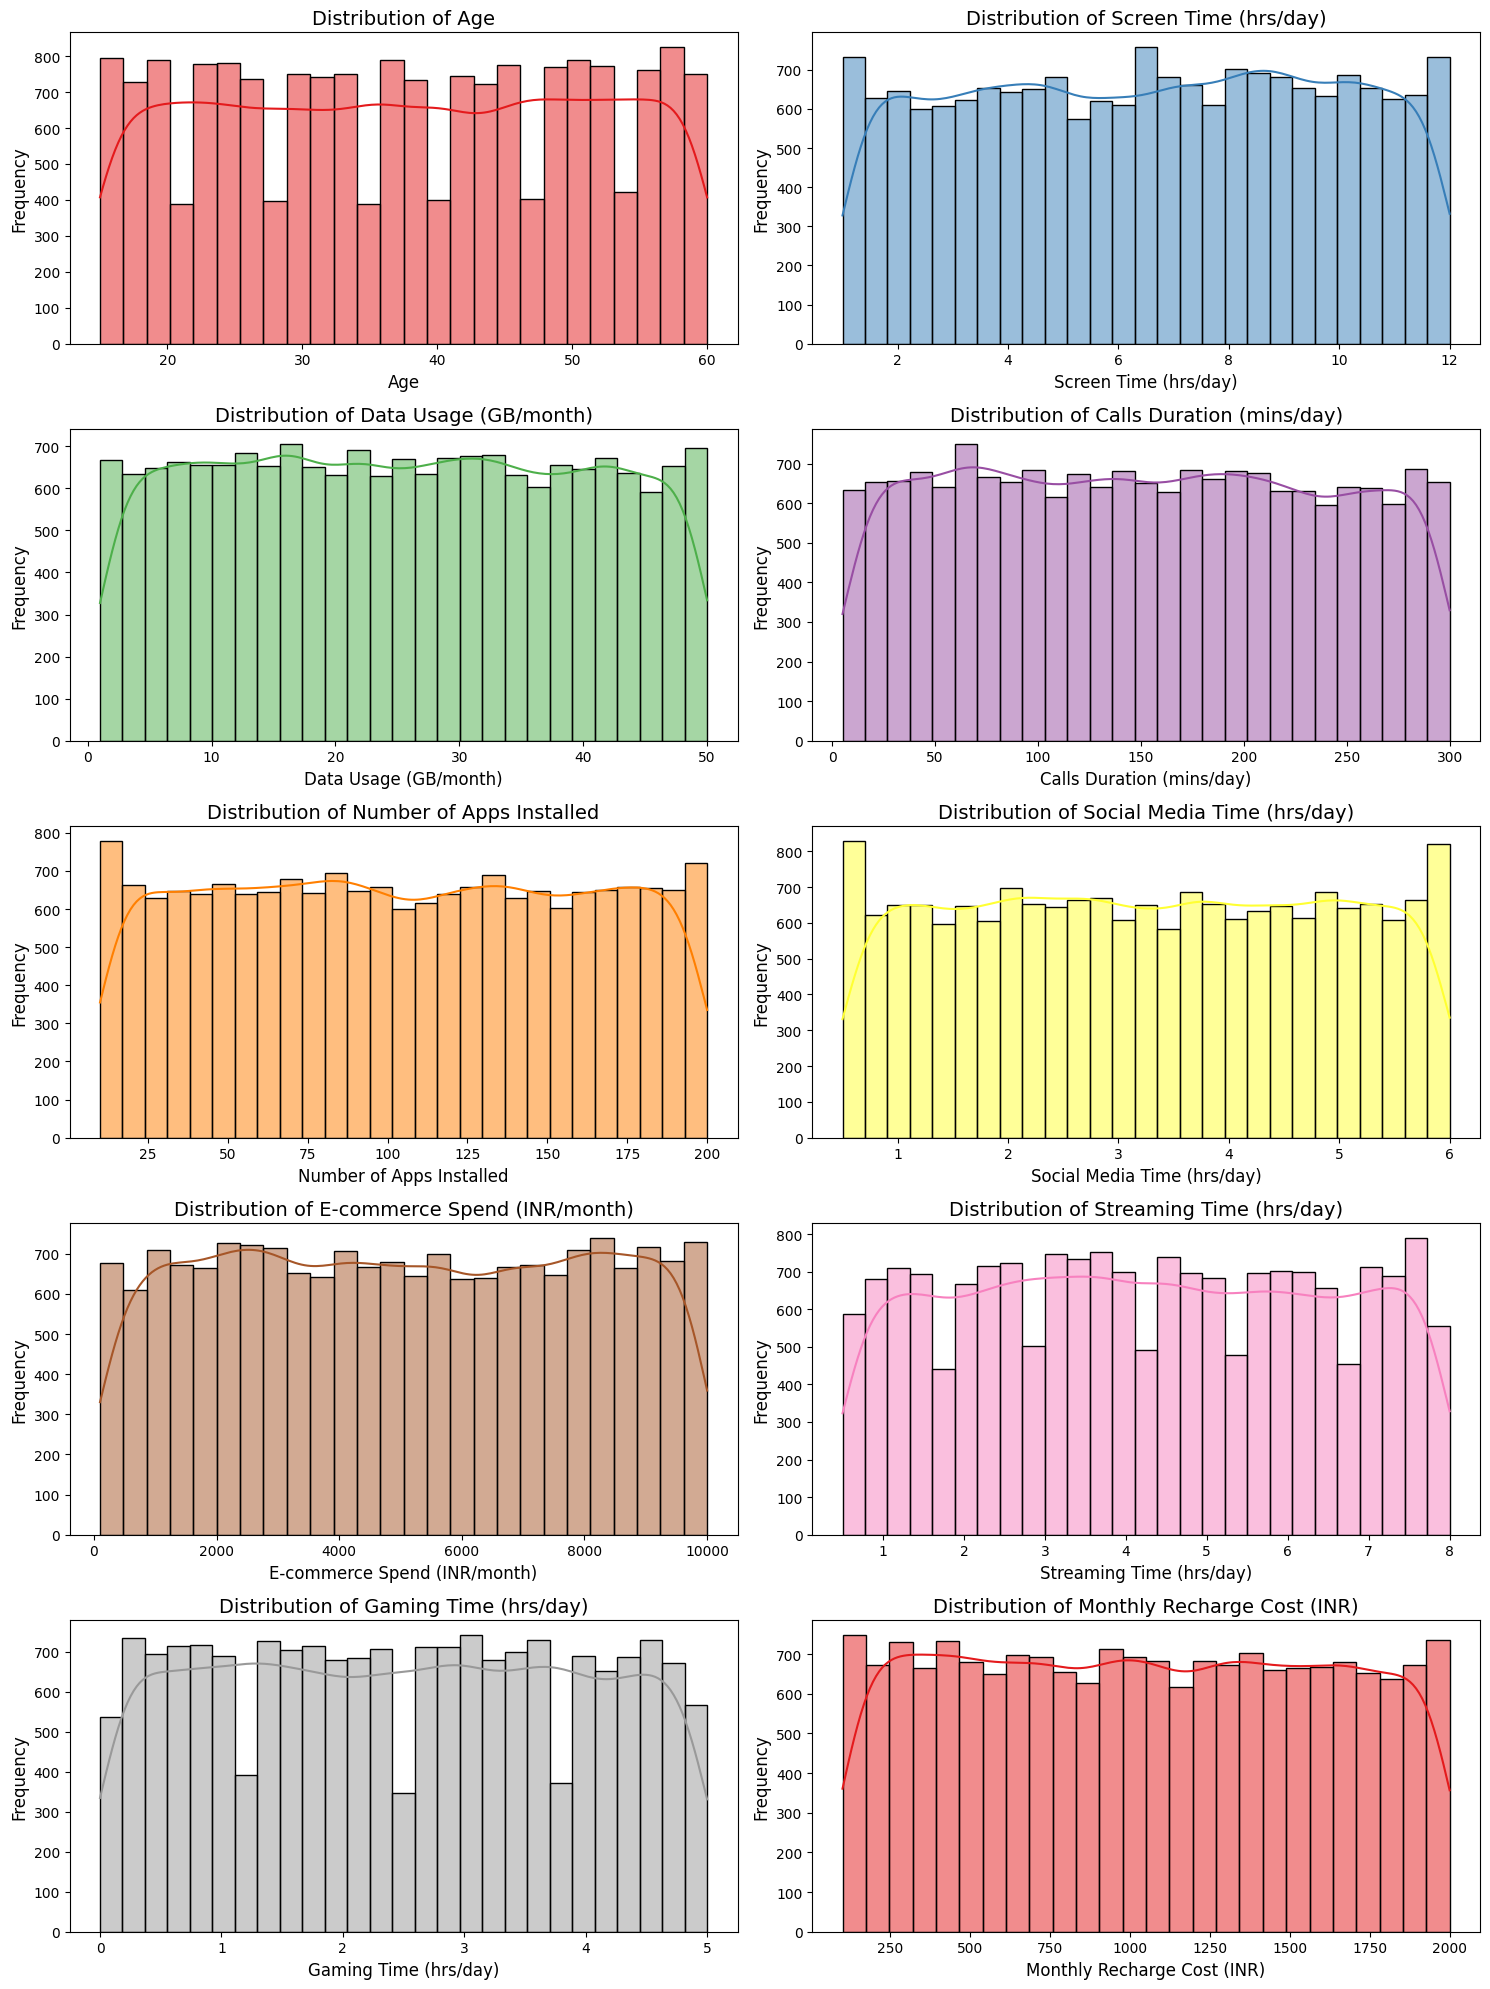

In [33]:
# Trend Analysis: Distribution of Screen Time, Data Usage, and Battery Consumption

columns = ['Age','Screen Time (hrs/day)','Data Usage (GB/month)','Calls Duration (mins/day)','Number of Apps Installed',
           'Social Media Time (hrs/day)','E-commerce Spend (INR/month)','Streaming Time (hrs/day)','Gaming Time (hrs/day)',
           'Monthly Recharge Cost (INR)']
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, color=sns.color_palette("Set1", len(columns))[i], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

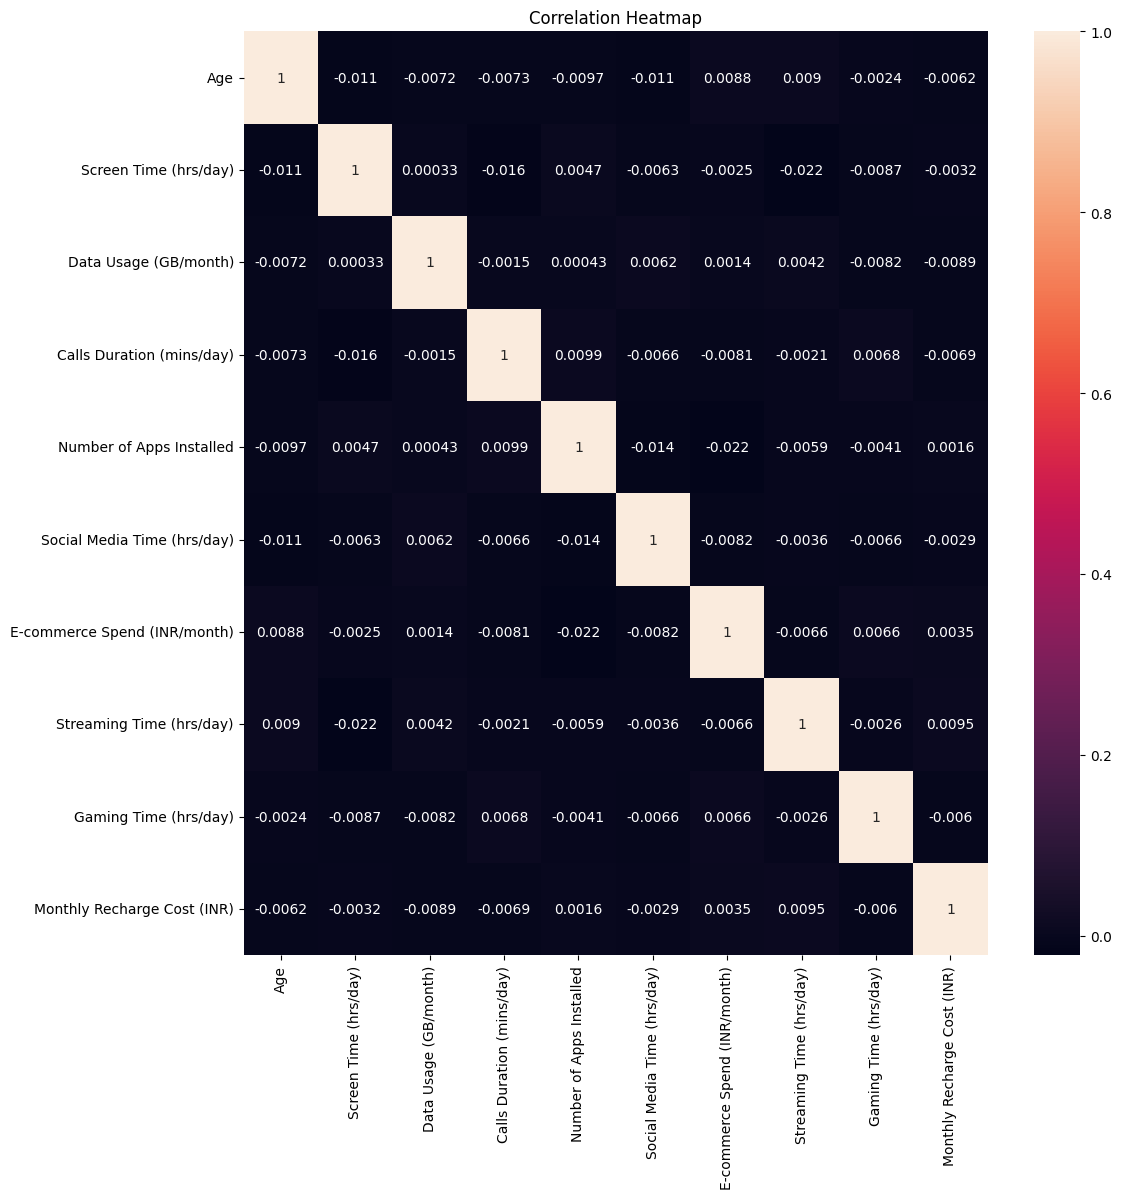

In [34]:
# Correlation Analysis: Identify relationships between key features
# Correlation Heatmap
plt.figure(figsize=(12,12))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot= True)
plt.title('Correlation Heatmap')
plt.show()

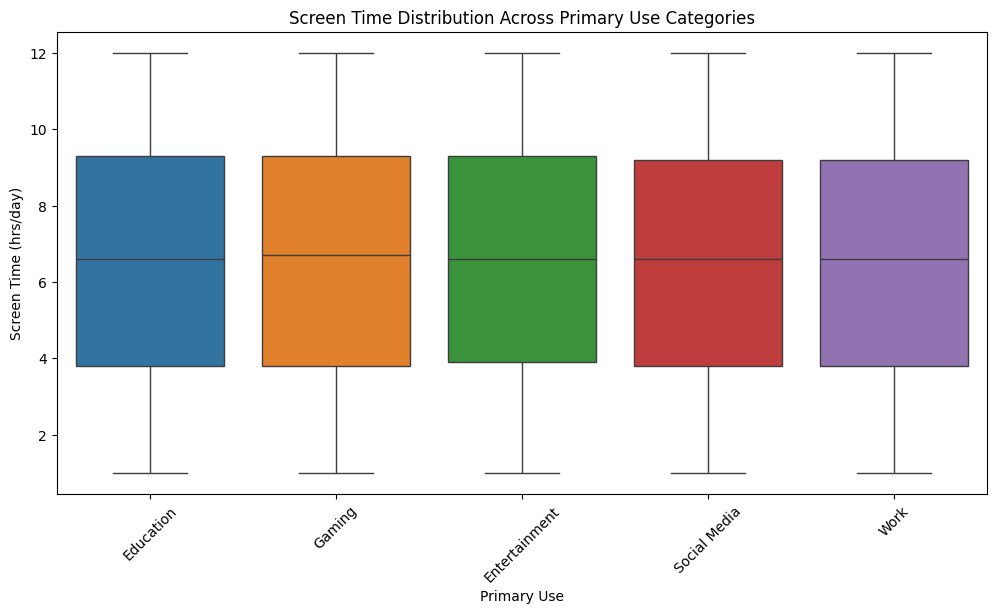

Average Usage Trends are: 
     Primary Use  Screen Time (hrs/day)  Data Usage (GB/month)
1  Entertainment               6.595653              25.583918
2         Gaming               6.568205              25.329614
4           Work               6.536238              25.363227
0      Education               6.530741              25.375312
3   Social Media               6.501885              25.410226


In [35]:
# Identifying patterns in Primary Use Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Primary Use', y='Screen Time (hrs/day)', data=df, hue= 'Primary Use')
plt.xticks(rotation=45)
plt.title('Screen Time Distribution Across Primary Use Categories')
plt.show()

# Convert categorical Primary Use to numerical for analysis
encoder = LabelEncoder()
df['Primary Use Encoded'] = encoder.fit_transform(df['Primary Use'])

# Analyzing the Average Screen Time for each Primary Use Category
usage_trends = df.groupby('Primary Use')[['Screen Time (hrs/day)', 'Data Usage (GB/month)']].mean().reset_index()

print("Average Usage Trends are: ")
print(usage_trends.sort_values(by='Screen Time (hrs/day)', ascending=False))


# Machine Learning and Clustering:


In [36]:
# Importing necessary Libraries

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle



In [37]:
# label encoding for categorical columns
le = LabelEncoder()
columns = ['Gender', 'Location', 'Phone Brand', 'OS', 'Primary Use']

for col in columns:
    df[col]= le.fit_transform(df[col])

# Selecting features for modeling
features = ['Age', 'Gender', 'OS','Screen Time (hrs/day)', 'Data Usage (GB/month)',
                   'Calls Duration (mins/day)', 'Number of Apps Installed',
                   'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
                   'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
                   'Monthly Recharge Cost (INR)'
                ]

In [38]:
df['Primary Use'] = df['Primary Use'].astype(str)  # Convert to string 

X = df[features]

y = df['Primary Use']

y = y.astype(int)



scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [39]:
y.value_counts()

Primary Use
0    3601
2    3576
4    3557
3    3501
1    3451
Name: count, dtype: int64

## Classifications

In [40]:
def clasificaions(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Train a model on the training data

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight="balanced", random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
        'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
        }

    trained_models = {}  # Store trained models
    results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall'])

    # Train the models on the training data
    for name, model in models.items():
        print(f"\nEvaluating {name}...")

        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=3)  # Reduce CV folds for speed
        avg_cv_score = np.mean(cv_scores)

        # Store trained model
        trained_models[name] = model

        # Append results to DataFrame
        results_df = pd.concat([results_df, pd.DataFrame({
            'Model': [name],
            'Accuracy': [accuracy],
            'Precision': [precision],
            'Recall': [recall],
            'Cross-Validation Score': [avg_cv_score]
        })], ignore_index=True)
        
        # Print classification report
        print(f"\nDetailed Classification Report for {name}:")
        print(classification_report(y_test, y_pred))

        # Identify the best model based on Accuracy score
        best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
        best_model = trained_models[best_model_name]


        best_model_filename = f"{best_model_name.lower()}_model.pkl"
        with open(best_model_filename, "wb") as model_file:
            pickle.dump(best_model, model_file)

    return results_df, best_model_name, best_model_filename


results_df, best_model_name, best_model_filename = clasificaions(X_scaled, y)



Evaluating Logistic Regression...

Detailed Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.20      0.25      0.23       726
           1       0.18      0.16      0.17       697
           2       0.19      0.22      0.21       709
           3       0.22      0.08      0.12       726
           4       0.20      0.28      0.23       680

    accuracy                           0.20      3538
   macro avg       0.20      0.20      0.19      3538
weighted avg       0.20      0.20      0.19      3538


Evaluating Decision Tree...


C:\Users\dakoj\AppData\Local\Temp\ipykernel_8004\3251421419.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({



Detailed Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.23      0.09      0.13       726
           1       0.20      0.12      0.15       697
           2       0.24      0.17      0.20       709
           3       0.23      0.10      0.14       726
           4       0.19      0.56      0.28       680

    accuracy                           0.20      3538
   macro avg       0.22      0.21      0.18      3538
weighted avg       0.22      0.20      0.18      3538


Evaluating Random Forest...

Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.19      0.19      0.19       726
           1       0.21      0.18      0.19       697
           2       0.18      0.20      0.19       709
           3       0.21      0.15      0.18       726
           4       0.20      0.27      0.23       680

    accuracy                           0.20      3538


c:\Users\dakoj\.conda\envs\phoneproject\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\dakoj\.conda\envs\phoneproject\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\dakoj\.conda\envs\phoneproject\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning


Detailed Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.22      0.21      0.22       726
           1       0.21      0.21      0.21       697
           2       0.21      0.22      0.21       709
           3       0.20      0.17      0.18       726
           4       0.18      0.21      0.19       680

    accuracy                           0.20      3538
   macro avg       0.20      0.20      0.20      3538
weighted avg       0.20      0.20      0.20      3538



In [41]:

# Print final results
print("\nModel Performance Summary:")
print(results_df.to_string(index=False))

# Print best model
print(f"\n🏆 The best model is: {best_model_name} (Saved as {best_model_filename})")



Model Performance Summary:
              Model  Accuracy  Precision   Recall  Cross-Validation Score
Logistic Regression  0.197852   0.200316 0.197852                0.196313
      Decision Tree  0.204918   0.218237 0.204918                0.203890
      Random Forest  0.197287   0.199038 0.197287                0.196030
            XGBoost  0.203222   0.204162 0.203222                0.200498

🏆 The best model is: Decision Tree (Saved as decision tree_model.pkl)


# Hyper parameter tuning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

# Define hyperparameters to tune
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4, 6]  
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# Grid search for best parameters
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt = grid_search.best_estimator_
print(f"Best Decision Tree Parameters: {grid_search.best_params_}")

# Train the best Decision Tree
best_dt.fit(X_train, y_train)

# Save the improved model
import pickle
with open("decision tree_model.pkl", "wb") as model_file:
    pickle.dump(best_dt, model_file)

print("Decision Tree model saved as decision tree_model.pkl")

Best Decision Tree Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree model saved as decision_tree_model.pkl


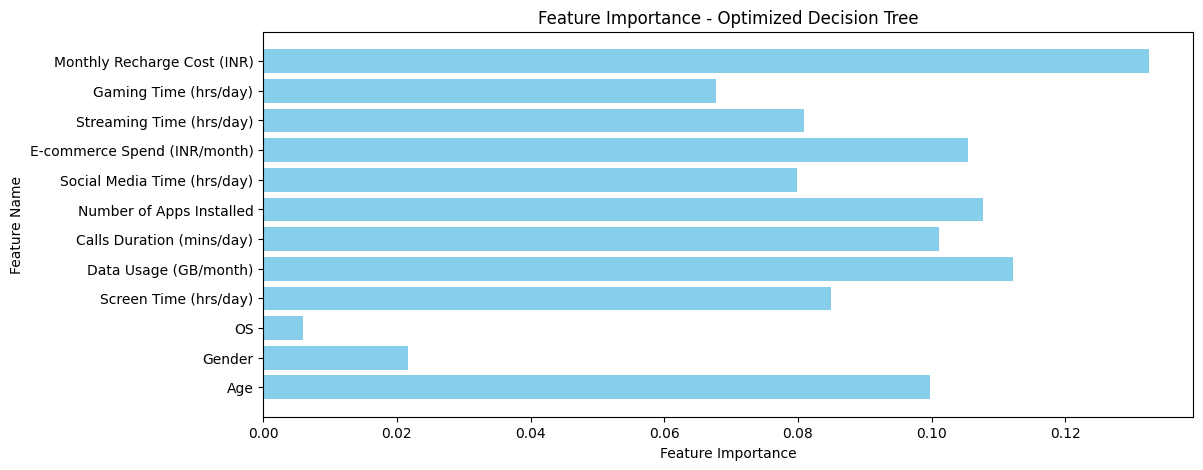

In [43]:
# Get feature importance from the best Decision Tree model
feature_importance = best_dt.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 5))
plt.barh(features, feature_importance, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Optimized Decision Tree")
plt.show()

In [ ]:
imp_features = ['Age','Screen Time (hrs/day)', 'Data Usage (GB/month)',
                   'Calls Duration (mins/day)', 'Number of Apps Installed',
                   'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
                   'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
                   'Monthly Recharge Cost (INR)'
                ]

# Update X dataset
X_filtered = X[imp_features]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Train Decision Tree Again
dt = DecisionTreeClassifier(max_depth= 15, min_samples_leaf= 1, min_samples_split= 10)
dt.fit(X_train, y_train)

# Save the updated model
with open("decision tree_model.pkl", "wb") as model_file:
    pickle.dump(dt, model_file)


# Clustering

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm

C:\Users\dakoj\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\dakoj\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\dakoj\.conda\envs\phoneproject\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dakoj\.conda\envs\phoneproject\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executab

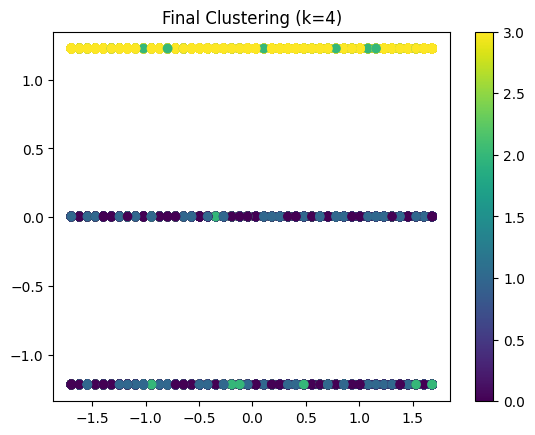

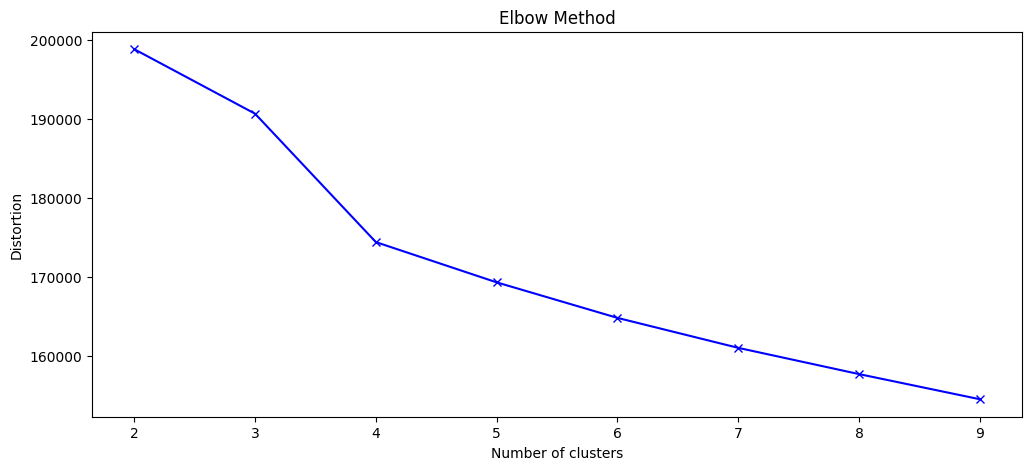

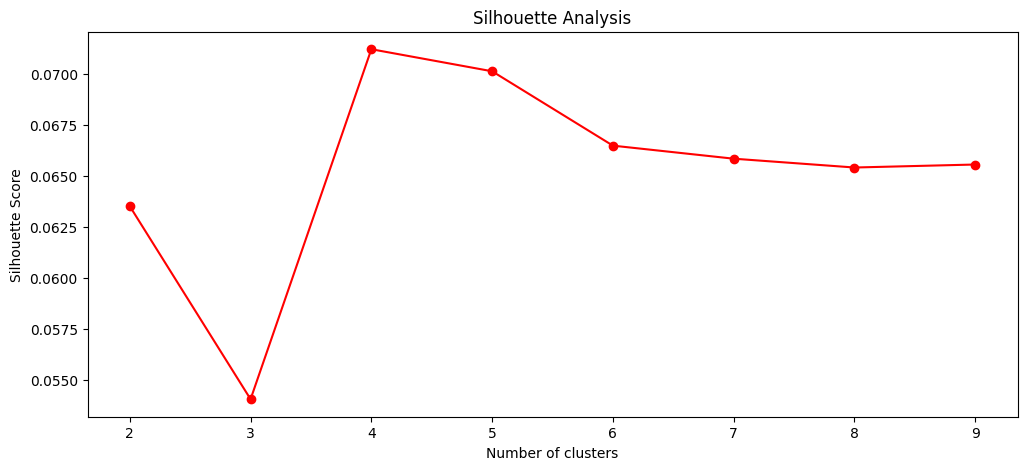

In [46]:


distortions = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

optimal_clusters = K[np.argmax(silhouette_scores)]
    
# Final clustering with optimal number
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
    

scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'Final Clustering (k={optimal_clusters})')
plt.colorbar(scatter)
    
plt.figure(figsize=(12,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')

plt.figure(figsize=(12,5))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.show()


Performing Hierarchical Clustering Analysis...


Analyzing Hierarchical: 100%|██████████| 5/5 [02:07<00:00, 25.56s/it]


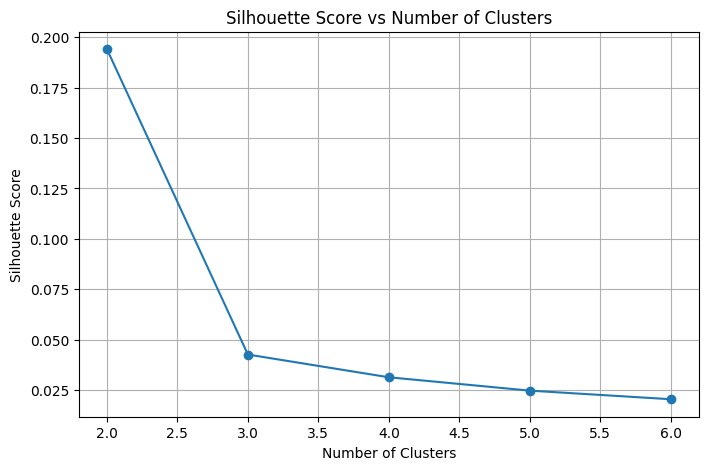

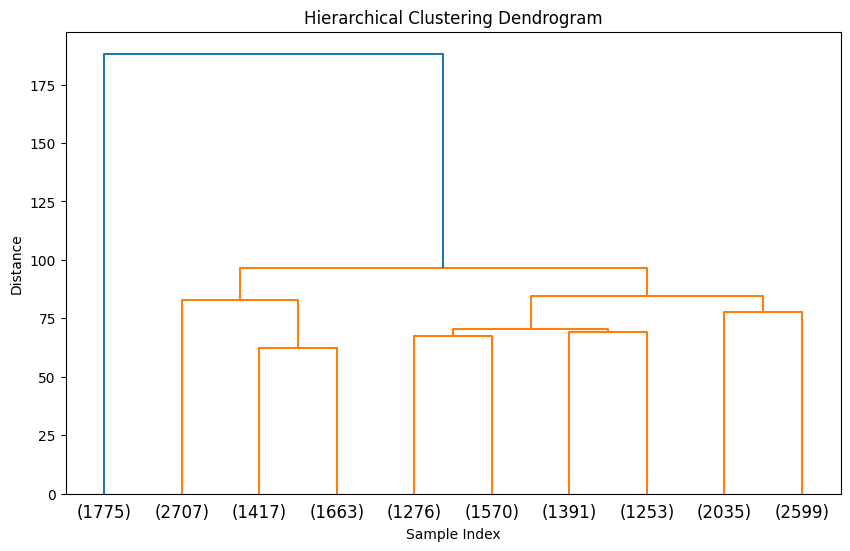

[0 0 0 ... 0 0 0] 2


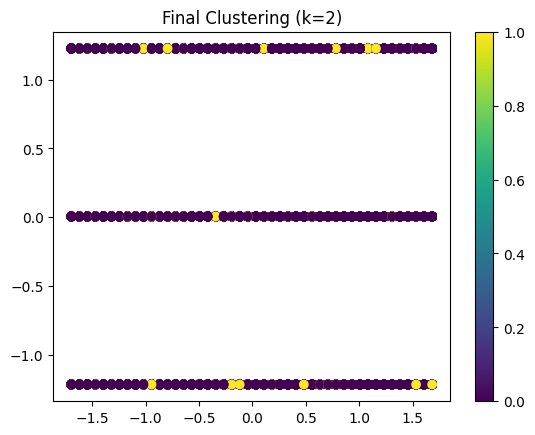

In [47]:
from tqdm import tqdm
n_clusters_range=range(2, 7)

print("Performing Hierarchical Clustering Analysis...")
results = {
        'silhouette_scores': [],
        'calinski_scores': []
    }

for n_clusters in tqdm(n_clusters_range, desc="Analyzing Hierarchical"):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchial_labels = hierarchical.fit_predict(X_scaled)
    results['silhouette_scores'].append(silhouette_score(X_scaled, hierarchial_labels))
    results['calinski_scores'].append(calinski_harabasz_score(X, hierarchial_labels))

# Determine the optimal number of clusters
optimal_clusters = n_clusters_range[np.argmax(results['silhouette_scores'])]

# Perform clustering with the optimal number of clusters
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchial_labels = hierarchical.fit_predict(X_scaled)

# === Plot 1: Silhouette Score Analysis ===
plt.figure(figsize=(8, 5))
plt.plot(list(n_clusters_range), results['silhouette_scores'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid()
plt.show()

# === Plot 2: Dendrogram ===
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchial_labels, cmap='viridis')
plt.title(f'Final Clustering (k={optimal_clusters})')
plt.colorbar(scatter)

print(hierarchial_labels, optimal_clusters)


Performing DBSCAN Analysis...


Analyzing DBSCAN: 100%|██████████| 10/10 [02:37<00:00, 15.72s/it]


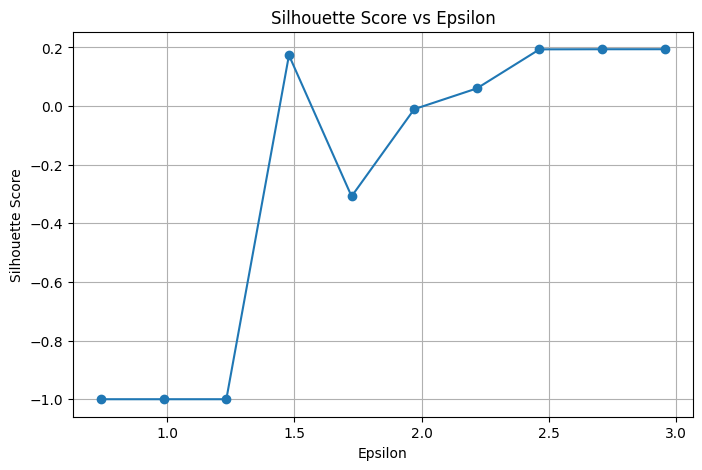

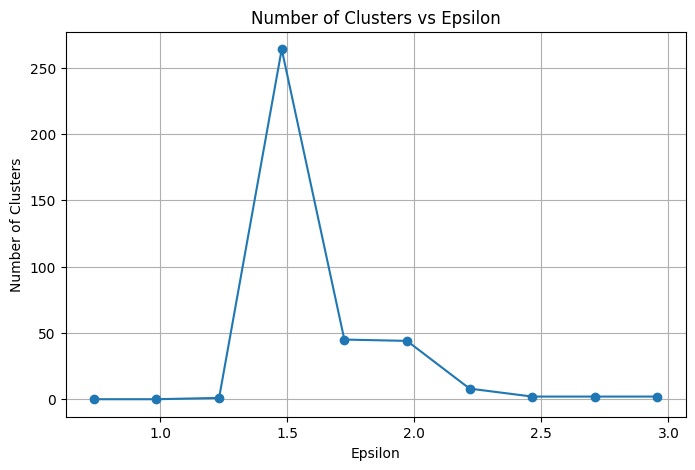

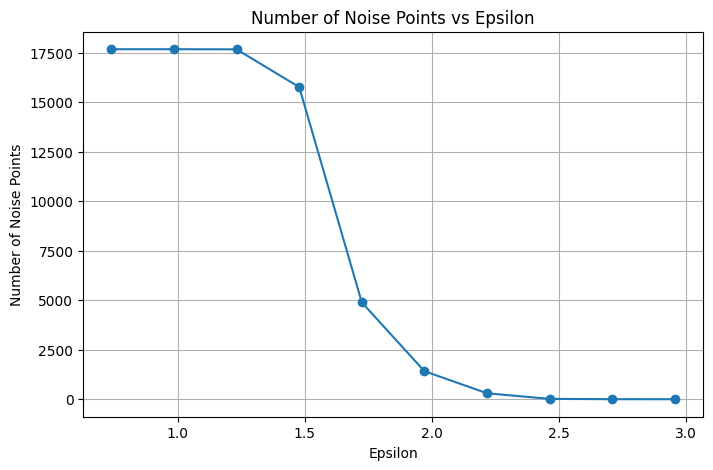

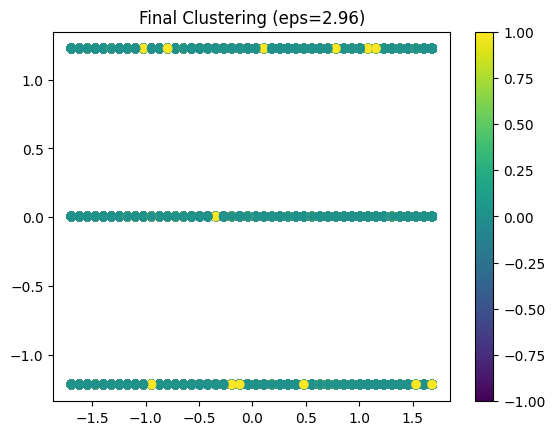

[0 0 0 ... 0 0 0] 2.956854097898222


In [48]:
print("Performing DBSCAN Analysis...")

# Determine eps range dynamically based on data
from sklearn.neighbors import NearestNeighbors

neighb = NearestNeighbors(n_neighbors=2)
neighb.fit(X_scaled)
distances, _ = neighb.kneighbors(X_scaled)
mean_dist = np.mean(distances[:, 1])
eps_range = np.linspace(mean_dist/2, mean_dist*2, 10)

results = {
    'eps_values': eps_range,
    'silhouette_scores': [],
    'n_clusters': [],
    'n_noise': []
}

for eps in tqdm(eps_range, desc="Analyzing DBSCAN"):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    # Only calculate silhouette score if there are at least 2 clusters
    if n_clusters >= 2 and n_noise < len(X_scaled):
        valid_points = labels != -1
        if np.sum(valid_points) > 1:
            sil_score = silhouette_score(X_scaled[valid_points], labels[valid_points])
        else:
            sil_score = -1
    else:
        sil_score = -1
        
    results['silhouette_scores'].append(sil_score)
    results['n_clusters'].append(n_clusters)
    results['n_noise'].append(n_noise)

# Determine the optimal epsilon
valid_scores = np.array(results['silhouette_scores'])
if np.all(valid_scores == -1):
    optimal_eps = eps_range[np.argmin(results['n_noise'])]
else:
    optimal_eps = eps_range[np.argmax(valid_scores)]

# Perform clustering with the optimal epsilon
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# === Plot 1: Silhouette Score Analysis ===
plt.figure(figsize=(8, 5))
plt.plot(eps_range, results['silhouette_scores'], marker='o', linestyle='-')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Epsilon')
plt.grid()
plt.show()

# === Plot 2: Number of Clusters ===
plt.figure(figsize=(8, 5))
plt.plot(eps_range, results['n_clusters'], marker='o', linestyle='-')
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs Epsilon')
plt.grid()
plt.show()

# === Plot 3: Number of Noise Points ===
plt.figure(figsize=(8, 5))
plt.plot(eps_range, results['n_noise'], marker='o', linestyle='-')
plt.xlabel('Epsilon')
plt.ylabel('Number of Noise Points')
plt.title('Number of Noise Points vs Epsilon')
plt.grid()
plt.show()

# === Plot 4: Final Clustering ===
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f'Final Clustering (eps={optimal_eps:.2f})')
plt.colorbar(scatter)
plt.show()

print(dbscan_labels, optimal_eps)


Performing GMM Analysis...


Analyzing GMM: 100%|██████████| 5/5 [00:46<00:00,  9.36s/it]


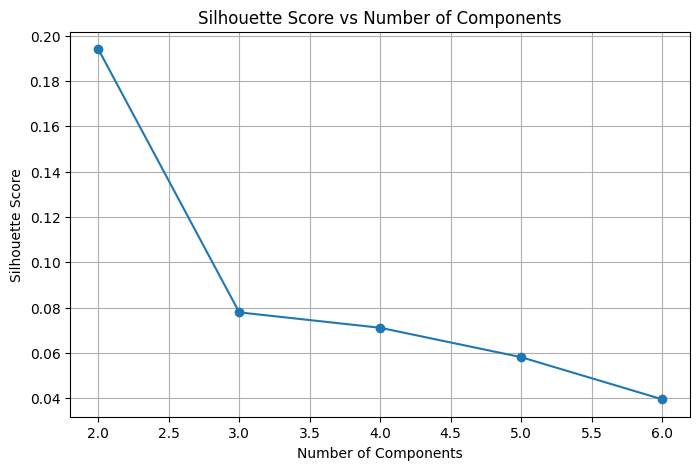

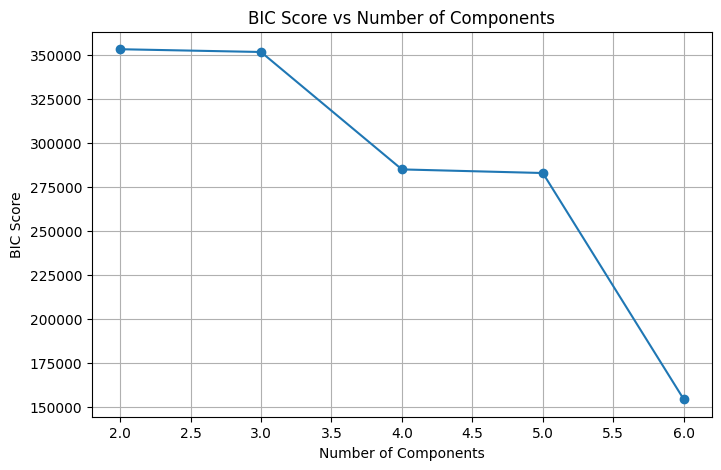

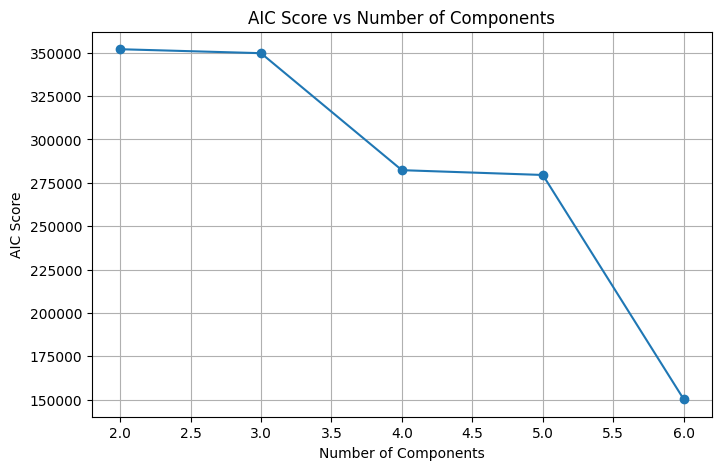

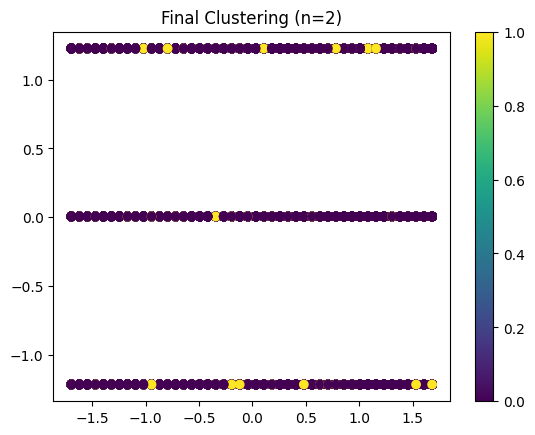

[0 0 0 ... 0 0 0] 2


In [49]:
print("Performing GMM Analysis...")


n_components_range = range(2, 7)

results = {
    'silhouette_scores': [],
    'bic_scores': [],
    'aic_scores': []
}

for n_components in tqdm(n_components_range, desc="Analyzing GMM"):
    gmm = GaussianMixture(n_components=n_components, random_state=42, n_init=5)
    labels = gmm.fit_predict(X_scaled)
    
    results['silhouette_scores'].append(silhouette_score(X_scaled, labels))
    results['bic_scores'].append(gmm.bic(X_scaled))
    results['aic_scores'].append(gmm.aic(X_scaled))

# Determine the optimal number of components
optimal_components = n_components_range[np.argmax(results['silhouette_scores'])]

# Perform clustering with the optimal number of components
gmm = GaussianMixture(n_components=optimal_components, random_state=42, n_init=5)
gmm_labels = gmm.fit_predict(X_scaled)

# === Plot 1: Silhouette Score Analysis ===
plt.figure(figsize=(8, 5))
plt.plot(list(n_components_range), results['silhouette_scores'], marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Components')
plt.grid()
plt.show()

# === Plot 2: BIC Scores ===
plt.figure(figsize=(8, 5))
plt.plot(list(n_components_range), results['bic_scores'], marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Components')
plt.grid()
plt.show()

# === Plot 3: AIC Scores ===
plt.figure(figsize=(8, 5))
plt.plot(list(n_components_range), results['aic_scores'], marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('AIC Score')
plt.title('AIC Score vs Number of Components')
plt.grid()
plt.show()

# === Plot 4: Final Clustering ===
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis')
plt.title(f'Final Clustering (n={optimal_components})')
plt.colorbar(scatter)
plt.show()

print(gmm_labels, optimal_components)


Performing Spectral Clustering Analysis...


Analyzing Spectral Clustering: 100%|██████████| 5/5 [25:15<00:00, 303.01s/it]


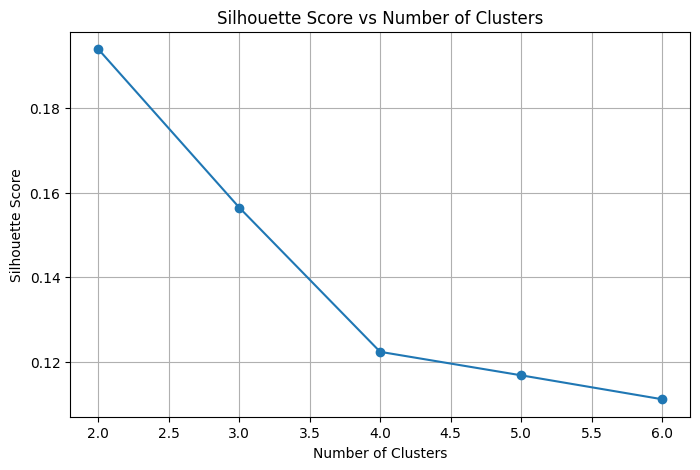

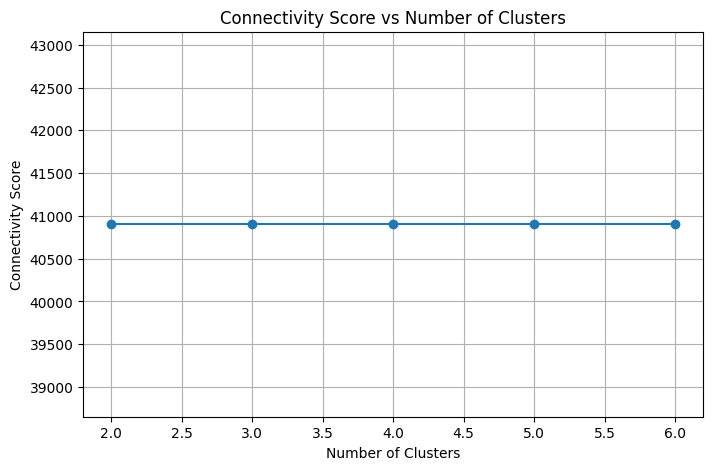

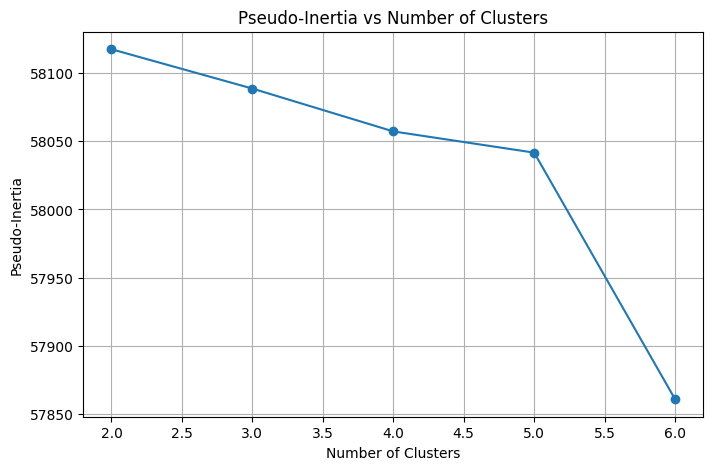

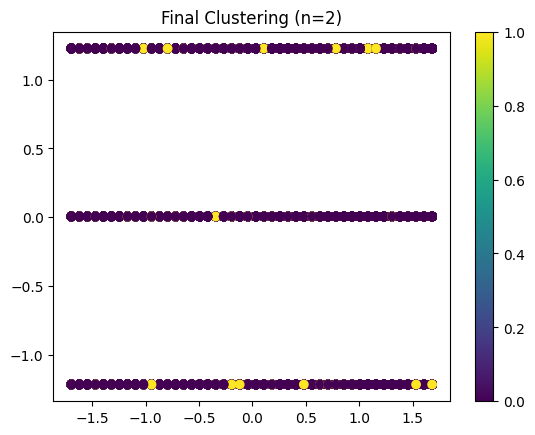

[0 0 0 ... 0 0 0] 2


In [50]:
print("Performing Spectral Clustering Analysis...")


n_clusters_range = range(2, 7)

affinity = 'rbf'
results = {
    'silhouette_scores': [],
    'inertia_scores': [],
    'connectivity_scores': []
}

for n_clusters in tqdm(n_clusters_range, desc="Analyzing Spectral Clustering"):
    spectral = SpectralClustering(
        n_clusters=n_clusters,
        affinity=affinity,
        random_state=42
    )
    labels = spectral.fit_predict(X_scaled)
    results['silhouette_scores'].append(silhouette_score(X_scaled, labels))
    distances = np.sum(spectral.affinity_matrix_)
    results['connectivity_scores'].append(distances)
    centroids = np.array([X_scaled[labels == i].mean(axis=0) for i in range(n_clusters)])
    inertia = sum(np.min(np.linalg.norm(X_scaled - centroids[:, np.newaxis], axis=2), axis=0))
    results['inertia_scores'].append(inertia)

optimal_clusters = n_clusters_range[np.argmax(results['silhouette_scores'])]

spectral = SpectralClustering(
    n_clusters=optimal_clusters,
    affinity=affinity,
    random_state=42
)
spectral_labels = spectral.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(list(n_clusters_range), results['silhouette_scores'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(list(n_clusters_range), results['connectivity_scores'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Connectivity Score')
plt.title('Connectivity Score vs Number of Clusters')
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(list(n_clusters_range), results['inertia_scores'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Pseudo-Inertia')
plt.title('Pseudo-Inertia vs Number of Clusters')
plt.grid()
plt.show()

scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=spectral_labels, cmap='viridis')
plt.title(f'Final Clustering (n={optimal_clusters})')
plt.colorbar(scatter)
plt.show()

print(spectral_labels, optimal_clusters)


In [53]:
# Store results
results = {
    'kmeans': kmeans_labels,
    'hierarchical': hierarchial_labels,
    'dbscan': dbscan_labels,
    'gmm': gmm_labels,
    'spectral': spectral_labels
}

# Add labels to original dataframe
for method, labels in results.items():
    df[f'cluster_{method}'] = labels

# Save results
df.to_csv('clustering_results.csv', index=False)
print("Clustering Completed Saving all the labels to clustering_results.csv")

Clustering Completed Saving all the labels to clustering_results.csv
